In [1]:
%matplotlib inline
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import cmocean.cm as cmo
import xarray as xr
import xroms
from WaterMassProperties import *

In [2]:
# ROMS file
romsfile = "../../../Downloads/norkyst_avg_0016.nc"

In [3]:
# Define Norkyst projection
norkyst_crs = ccrs.Stereographic(central_latitude=90, central_longitude=70, true_scale_latitude=60,false_easting=3369600, false_northing=1844800)

In [4]:
# Open with xarray and make xroms object
ds = xr.open_dataset(romsfile)
ds, xgrid = xroms.roms_dataset(ds)

In [5]:
# List CF axes that can be used for data access.
# ds.salt.cf.describe()

In [6]:
# Make subset for Skagerrak
ds = ds.cf.isel(X=slice(0,1000), Y=slice(0,1000))

In [7]:
# Calculate freshwater height
max_depth = -20.0
FWH = fwh(ds.salt.values, ds.z_w.values, maxdepth=max_depth)

# Choosing first time record (in the current example it's only one record!), 
# flatten and set to NaN where it is shallower than maximum depth.
FWH = FWH[0,:,:].squeeze() 
FWH[np.where(ds.h.values<-max_depth)] = np.nan

In [8]:
# Calculate profile potential energy
max_depth = -50.0
PPE = ppe(ds.rho.values, ds.z_w.values, maxdepth=max_depth)

# Choosing first time record (in the current example it's only one record!), 
# flatten and set to NaN where it is shallower than maximum depth.
PPE = PPE[0,:,:].squeeze() 
PPE[np.where(ds.h.values<-max_depth)] = np.nan

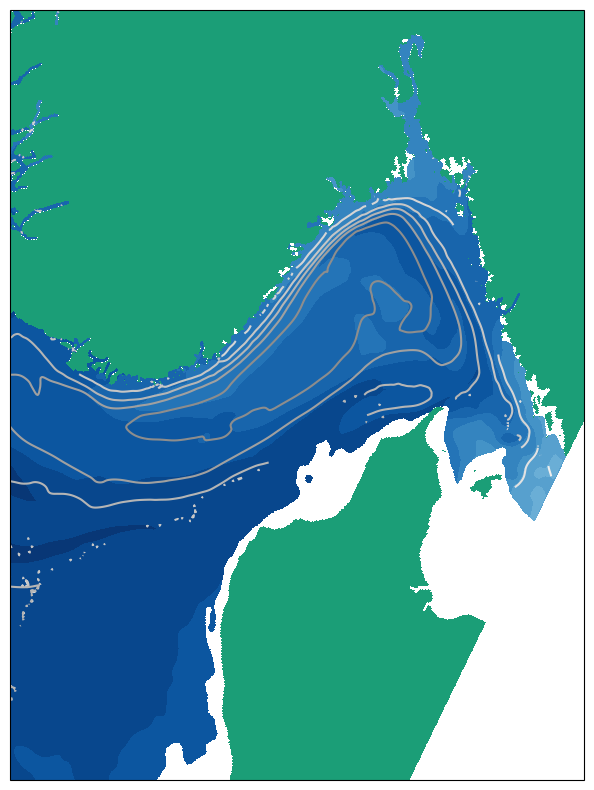

In [9]:
proj = ccrs.AzimuthalEquidistant(central_longitude=5, central_latitude = 60)
fig, ax = plt.subplots(figsize=(10,10),subplot_kw=dict(projection=proj), ncols=1, nrows = 1)
ax.set_extent([6, 11.8, 55.7, 60], ccrs.PlateCarree())


maskmap = plt.cm.Dark2
maskmap.set_bad('w')
maskrho = ds.mask_rho.values
maskrho[np.where(maskrho>0.5)] = np.nan
ax.pcolormesh(ds.lon_rho.values, ds.lat_rho.values, maskrho, transform=ccrs.PlateCarree(), cmap=maskmap)

ax.contourf(ds.lon_rho.values, ds.lat_rho.values, FWH, 15, transform=ccrs.PlateCarree(), cmap=plt.cm.Blues_r)
ax.contour(ds.lon_rho.values, ds.lat_rho.values, PPE, 15, transform=ccrs.PlateCarree(), cmap=plt.cm.Greys)

